In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Utils
from sklearn.model_selection import train_test_split
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy.stats import loguniform
import re 

# Preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# Algorithms
from sklearn.linear_model import LogisticRegression

# Dealing with warnings
import warnings
warnings.filterwarnings('ignore')

# Setting DataFrame's to show 100 max columns, instead of compressing then
pd.set_option('display.max_columns', 100)

In [2]:
people = pd.read_csv('../raw_data/people_analytics.csv')

In [3]:
people.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
people['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [5]:
people.shape

(1470, 35)

In [6]:
def camel_case_split(str): 
    return '_'.join(re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', str))

In [7]:
new_columns = []
for str in people.columns.tolist():
    new_columns.append(camel_case_split(str).lower())

In [8]:
people.columns = new_columns

In [9]:
people.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_count',
       'employee_number', 'environment_satisfaction', 'gender', 'hourly_rate',
       'job_involvement', 'job_level', 'job_role', 'job_satisfaction',
       'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over', 'over_time', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager'],
      dtype='object')

In [10]:
people.drop(columns = ['employee_count', 'over', 'standard_hours', 'employee_number'], inplace = True)

In [11]:
people_train, people_test = train_test_split(people, random_state = 0)

In [12]:
people_train.shape

(1102, 31)

No     923
Yes    179
Name: attrition, dtype: int64


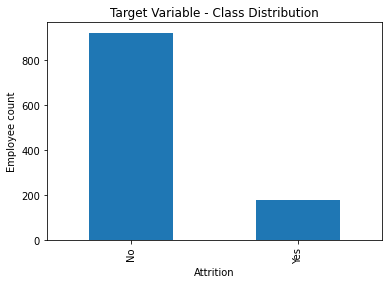

In [13]:
# Counting values from 0 and 1 in the target variable
print(people_train['attrition'].value_counts())

# Plotting the target class proportion
people_train['attrition'].value_counts().plot(kind = 'bar')
plt.title('Target Variable - Class Distribution')
plt.xlabel('Attrition')
plt.ylabel('Employee count');

In [14]:
ordinal_cols = [
    'education',
    'environment_satisfaction',
    'job_involvement',
    'job_level',
    'job_satisfaction',
    'performance_rating',
    'relantionship_satisfaction',
    'stock_option_level',
    'work_life_balance'
]

numeric_cols = [
    'age',
    'daily_rate',
    'distance_from_home',
    'hourly_rate',
    'monthly_income',
    'monthly_rate',
    'num_companies_worked',
    'percent_salary_hike',
    'total_working_years',
    'training_times_last_year',
    'years_at_company',
    'years_in_current_role',
    'years_since_last_promotion',
    'years_with_curr_manager'
]

numeric_ordinal_cols = [
    'age',
    'daily_rate',
    'distance_from_home',
    'hourly_rate',
    'monthly_income',
    'monthly_rate',
    'num_companies_worked',
    'percent_salary_hike',
    'total_working_years',
    'training_times_last_year',
    'years_at_company',
    'years_in_current_role',
    'years_since_last_promotion',
    'years_with_curr_manager',
    'education',
    'environment_satisfaction',
    'job_involvement',
    'job_level',
    'job_satisfaction',
    'performance_rating',
    'relationship_satisfaction',
    'stock_option_level',
    'work_life_balance'
]

categorical_cols = [
    'business_travel',
    'department',
    'education_field',
    'gender',
    'job_role',
    'marital_status',
    'over_time'
]

<AxesSubplot:>

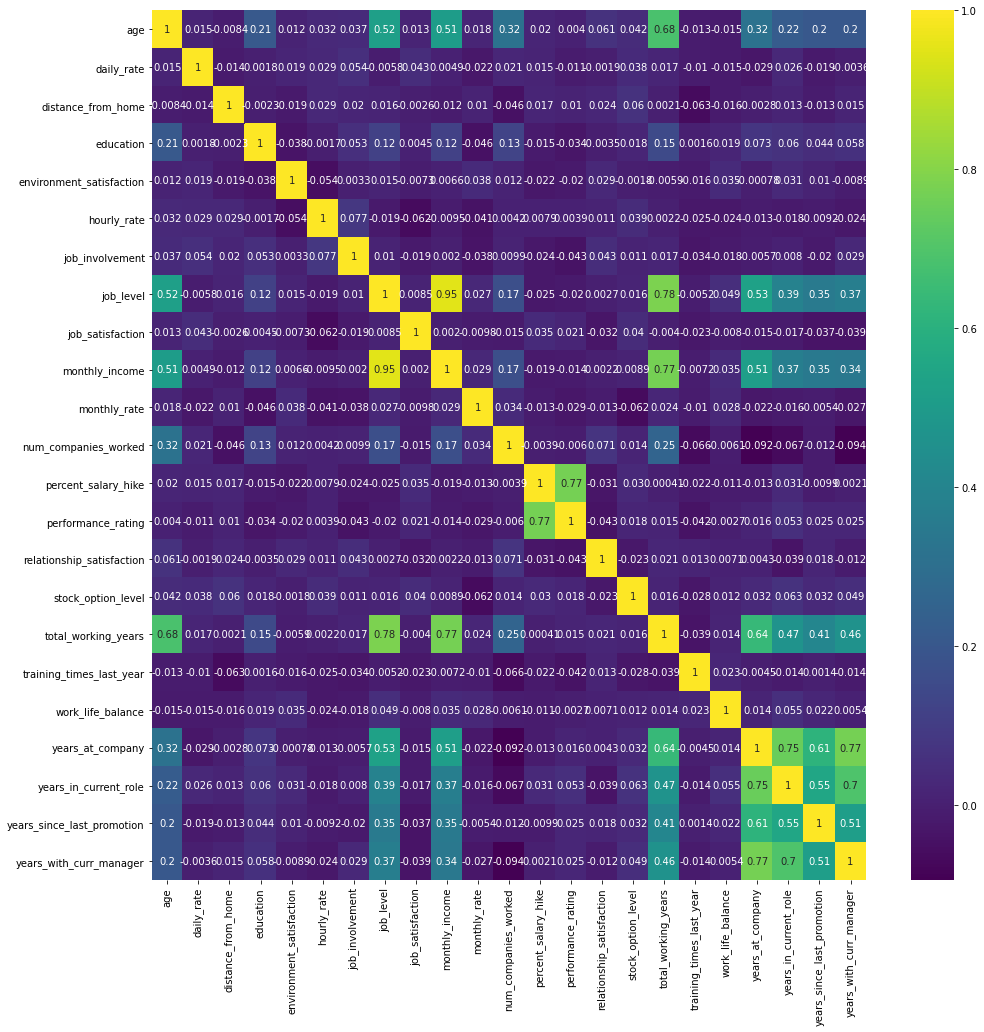

In [15]:
corr = people_train.corr()

plt.figure(figsize = (16, 16))
sns.heatmap(corr, annot = True, cmap = 'viridis')

In [16]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return print(pd.DataFrame(au_corr[0:n], columns = ['ABS CORR']))

In [17]:
get_top_abs_correlations(people_train[numeric_ordinal_cols], n = 10)

                                                  ABS CORR
monthly_income        job_level                   0.949169
total_working_years   job_level                   0.784325
percent_salary_hike   performance_rating          0.772279
monthly_income        total_working_years         0.769750
years_at_company      years_with_curr_manager     0.769263
                      years_in_current_role       0.747832
years_in_current_role years_with_curr_manager     0.695595
age                   total_working_years         0.684737
total_working_years   years_at_company            0.639788
years_at_company      years_since_last_promotion  0.613853


## Feature Engineering

In [18]:
# Creating supporting table: Monthly Income grouped by Department and Job Level
_minc_gb = people_train.groupby(['department', 'job_level'])['monthly_income'].median()

print(_minc_gb['Human Resources', 1], '\n')
print(_minc_gb)

2467.0 

department              job_level
Human Resources         1             2467.0
                        2             5985.0
                        3             9756.0
                        4            16799.0
                        5            19189.0
Research & Development  1             2690.5
                        2             5109.5
                        3            10388.0
                        4            16422.0
                        5            19237.0
Sales                   1             2408.5
                        2             5396.0
                        3             9151.0
                        4            15972.0
                        5            19586.0
Name: monthly_income, dtype: float64


In [19]:
# Creating departments list and job levels list for later iteration
departments = people_train['department'].unique().tolist()
print(departments)

job_levels = sorted(people_train['job_level'].unique().tolist())
print(job_levels)

# Creating 'below_median_dpt_joblevel_monthly_income' column and populating with boolean 
# values (1, for True, 0 for False)
for department in departments:
    for job_level in job_levels:
        people_train.loc[((people_train['department'] == department) & \
                          (people_train['job_level'] == job_level) & \
                          (people_train['monthly_income'] < _minc_gb[department, job_level])), \
                             'below_median_dpt_joblevel_monthly_income'] = int(1)
        
        people_train.loc[((people_train['department'] == department) & \
                          (people_train['job_level'] == job_level) & \
                          (people_train['monthly_income'] >= _minc_gb[department, job_level])), \
                             'below_median_dpt_joblevel_monthly_income'] = int(0)

# Transforming float bools to int
people_train['below_median_dpt_joblevel_monthly_income'] = \
                    people_train['below_median_dpt_joblevel_monthly_income'].apply(int)

['Research & Development', 'Human Resources', 'Sales']
[1, 2, 3, 4, 5]


In [20]:
people_train.head(3)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,below_median_dpt_joblevel_monthly_income
944,28,No,Non-Travel,1476,Research & Development,1,3,Life Sciences,3,Female,55,1,2,Laboratory Technician,4,Married,6674,16392,0,No,11,3,1,3,10,6,3,9,8,7,5,0
1402,31,No,Travel_Rarely,1276,Research & Development,2,1,Medical,4,Female,59,1,1,Laboratory Technician,4,Divorced,1129,17536,1,Yes,11,3,3,3,1,4,3,1,0,0,0,1
1054,49,No,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,3,Male,35,3,3,Healthcare Representative,2,Divorced,10466,20948,3,No,14,3,2,2,29,3,3,8,7,0,7,0


In [21]:
# Creating new temporary variable for mapping future variable Job Role Different from Edu Field
people_train['edu_field_job_role'] = people_train['education_field'] + '_' + people_train['job_role']

# Creating dict for mapping new variable Job Role Different from Edu Field
edu_field_job_role_map = { 
     'Human Resources_Human Resources': 0,
     'Human Resources_Manager': 0,
     'Life Sciences_Healthcare Representative': 0,
     'Life Sciences_Human Resources': 1,
     'Life Sciences_Laboratory Technician': 0,
     'Life Sciences_Manager': 1,
     'Life Sciences_Manufacturing Director': 0,
     'Life Sciences_Research Director': 0,
     'Life Sciences_Research Scientist': 0,
     'Life Sciences_Sales Executive': 1,
     'Life Sciences_Sales Representative': 1,
     'Marketing_Manager': 0,
     'Marketing_Sales Executive': 0,
     'Marketing_Sales Representative': 0,
     'Medical_Healthcare Representative': 0,
     'Medical_Human Resources': 1,
     'Medical_Laboratory Technician': 0,
     'Medical_Manager': 1,
     'Medical_Manufacturing Director': 0,
     'Medical_Research Director': 0,
     'Medical_Research Scientist': 0,
     'Medical_Sales Executive': 1,
     'Medical_Sales Representative': 1,
     'Other_Healthcare Representative': 0,
     'Other_Human Resources': 0,
     'Other_Laboratory Technician': 0,
     'Other_Manager': 0,
     'Other_Manufacturing Director': 0,
     'Other_Research Director': 0,
     'Other_Research Scientist': 0,
     'Other_Sales Executive': 0,
     'Other_Sales Representative': 0,
     'Technical Degree_Healthcare Representative': 0,
     'Technical Degree_Human Resources': 0,
     'Technical Degree_Laboratory Technician': 0,
     'Technical Degree_Manager': 0,
     'Technical Degree_Manufacturing Director': 0,
     'Technical Degree_Research Director': 0,
     'Technical Degree_Research Scientist': 0,
     'Technical Degree_Sales Executive': 0,
     'Technical Degree_Sales Representative': 0
}

# Mapping variable Job Role Different from Edu Field with bools, as per dict edu_field_job_role_map
people_train['job_role_diff_edu_field'] = people_train['edu_field_job_role'].map(edu_field_job_role_map)

people_train = people_train.drop('edu_field_job_role', axis = 1)

In [22]:
# Distance from home analysis (INCONCLUSIVE!)
# plt.scatter('distance_from_home', 'job_satisfaction', 
#             data = people_train[people_train['attrition'] == 'Yes'], alpha = .1)
# plt.show()

# plt.scatter('distance_from_home', 'job_satisfaction', 
#             data = people_train[people_train['attrition'] == 'No'], alpha = .1)

In [23]:
# sns.distplot(people_train[people_train['attrition'] == 'Yes']['distance_from_home'])
# sns.distplot(people_train[people_train['attrition'] == 'No']['distance_from_home'])

In [24]:
people_train.head(3)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,below_median_dpt_joblevel_monthly_income,job_role_diff_edu_field
944,28,No,Non-Travel,1476,Research & Development,1,3,Life Sciences,3,Female,55,1,2,Laboratory Technician,4,Married,6674,16392,0,No,11,3,1,3,10,6,3,9,8,7,5,0,0
1402,31,No,Travel_Rarely,1276,Research & Development,2,1,Medical,4,Female,59,1,1,Laboratory Technician,4,Divorced,1129,17536,1,Yes,11,3,3,3,1,4,3,1,0,0,0,1,0
1054,49,No,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,3,Male,35,3,3,Healthcare Representative,2,Divorced,10466,20948,3,No,14,3,2,2,29,3,3,8,7,0,7,0,0


In [25]:
# Creating Prometed in the Last Two Years variable; bool: 1 True, 0 False
people_train['promoted_last_2_years'] = \
        people_train['years_since_last_promotion'].apply(lambda x: 1 if x <= 2 else 0)

In [26]:
# Checking minimal value for Monthly Income contitioned to 0 Total Working Years
people_train[people_train['total_working_years'] == 0]['monthly_income'].describe()

count      10.000000
mean     1524.600000
std       290.596398
min      1051.000000
25%      1279.000000
50%      1590.000000
75%      1698.250000
max      1904.000000
Name: monthly_income, dtype: float64

In [27]:
# # Creating Monthly Income per Toatl Years Workerd variable
# people_train['m_income_per_total_years_worked'] = \
#         people_train['monthly_income'] / people_train['total_working_years']

In [28]:
# # Replacing np.inf with minimun value of monthly_income variable
# people_train[people_train['m_income_per_total_years_worked'] == np.inf] = 100

In [29]:
# people_train['m_income_per_total_years_worked'].describe()

In [30]:
# Monthly Income per Age
people_train['m_income_per_age'] = people_train['monthly_income'] / people_train['age']

In [31]:
salary_hike_median = people_train['percent_salary_hike'].median()

people_train['below_median_pct_salary_hike'] = \
        people_train['percent_salary_hike'].apply(lambda x: 1 if x < salary_hike_median else 0)

In [32]:
people_train['attrition'] = people_train['attrition'].map({
                                                'No': 0,
                                                'Yes': 1
                                            })

people_train['gender_male'] = people_train['gender'].map({
                                                'Female': 0,
                                                'Male': 1
                                            })

people_train['over_time'] = people_train['over_time'].map({
                                                'No': 0,
                                                'Yes': 1
                                            })

people_train = people_train.drop('gender', axis = 1)

In [33]:
people_train.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,below_median_dpt_joblevel_monthly_income,job_role_diff_edu_field,promoted_last_2_years,m_income_per_age,below_median_pct_salary_hike,gender_male
944,28,0,Non-Travel,1476,Research & Development,1,3,Life Sciences,3,55,1,2,Laboratory Technician,4,Married,6674,16392,0,0,11,3,1,3,10,6,3,9,8,7,5,0,0,0,238.357143,1,0
1402,31,0,Travel_Rarely,1276,Research & Development,2,1,Medical,4,59,1,1,Laboratory Technician,4,Divorced,1129,17536,1,1,11,3,3,3,1,4,3,1,0,0,0,1,0,1,36.419355,1,0
1054,49,0,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,3,35,3,3,Healthcare Representative,2,Divorced,10466,20948,3,0,14,3,2,2,29,3,3,8,7,0,7,0,0,1,213.591837,0,1
1128,36,0,Travel_Frequently,1302,Research & Development,6,4,Life Sciences,1,80,4,2,Laboratory Technician,1,Married,5562,19711,3,1,13,3,4,1,9,3,3,3,2,0,2,0,0,1,154.500000,1,1
1323,28,0,Non-Travel,280,Human Resources,1,2,Life Sciences,3,43,3,1,Human Resources,4,Divorced,2706,10494,1,0,15,3,2,1,3,2,3,3,2,2,2,0,1,1,96.642857,0,1


<AxesSubplot:>

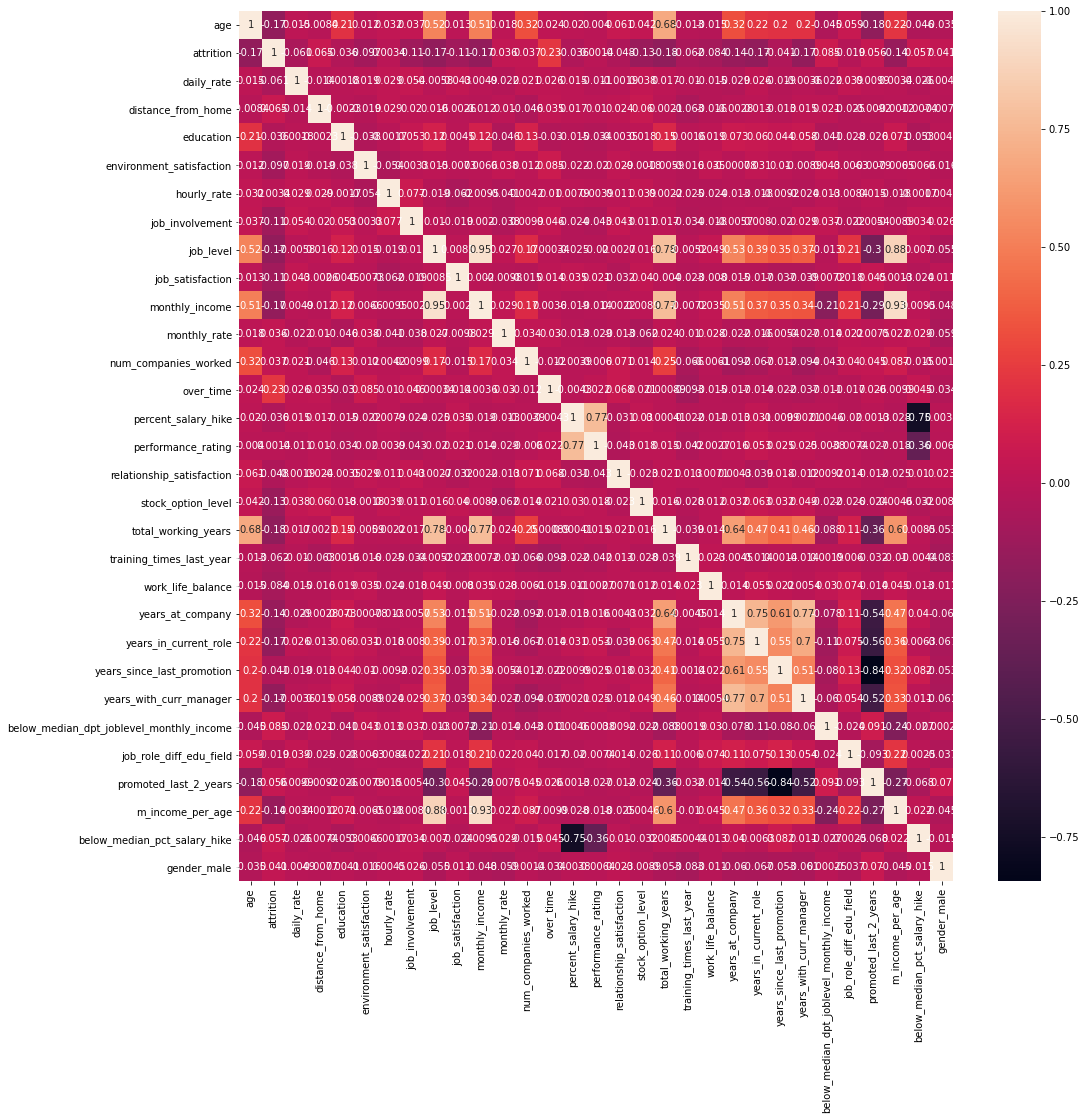

In [34]:
corr2 = people_train.corr()
plt.figure(figsize = (16, 16))
sns.heatmap(corr2, annot = True)

<AxesSubplot:>

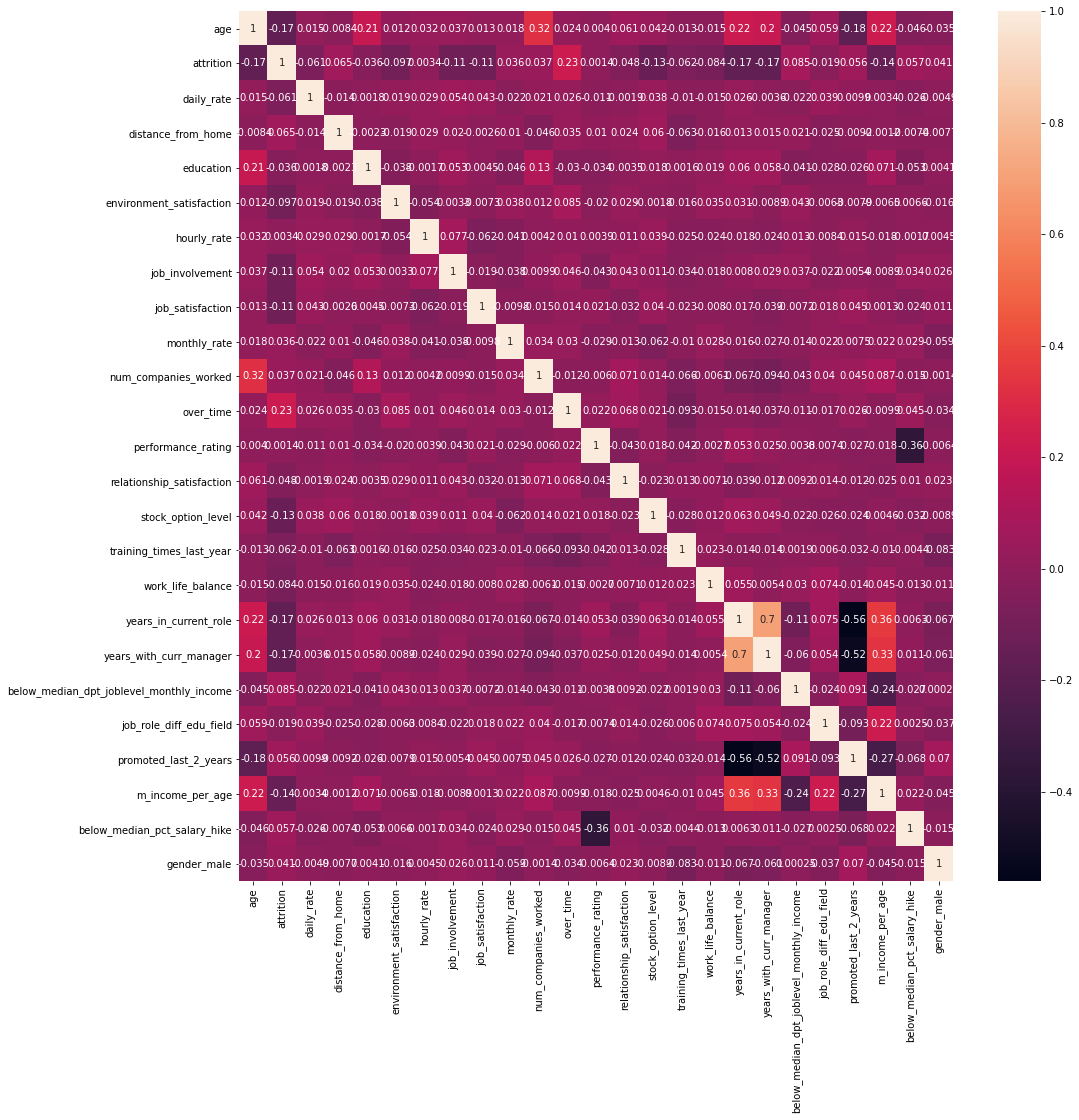

In [35]:
people_train = people_train.drop([
                                   'job_level', 
                                   'monthly_income', 
                                   'years_since_last_promotion', 
                                   'total_working_years', 
                                   'percent_salary_hike',
                                   'years_at_company',
#                                    'years_with_curr_manager',
#                                    'years_in_current_role'
                                  ], axis = 1)
corr3 = people_train.corr()
plt.figure(figsize = (16, 16))
sns.heatmap(corr3, annot = True)

In [36]:
people_train = pd.get_dummies(people_train)

In [37]:
# plt.figure(figsize = (16, 16))
# sns.heatmap(people_train.corr(), annot = True)

In [38]:
# # Checking VIF
# df = pd.DataFrame()
# df['vif_index'] = [vif(people_train.values, i) for i in range(people_train.shape[1])]

In [39]:
get_top_abs_correlations(people_train, n = 20)

                                                                     ABS CORR
department_Research & Development department_Sales                   0.901068
department_Human Resources        job_role_Human Resources           0.890206
department_Sales                  job_role_Sales Executive           0.817416
business_travel_Travel_Frequently business_travel_Travel_Rarely      0.746275
department_Research & Development job_role_Sales Executive           0.736548
years_in_current_role             years_with_curr_manager            0.695595
stock_option_level                marital_status_Single              0.652713
department_Human Resources        education_field_Human Resources    0.639322
marital_status_Married            marital_status_Single              0.627857
education_field_Life Sciences     education_field_Medical            0.569313
years_in_current_role             promoted_last_2_years              0.559831
job_role_diff_edu_field           department_Research & Developm

In [40]:
# people_train.info()

In [41]:
X = people_train.drop('attrition', axis = 1)
y = people_train['attrition']

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .3, random_state = 0)

In [43]:
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

In [45]:
lgmodel = LogisticRegression(random_state=0)
lgmodel.fit(X_train_smote, y_train_smote)
sacc = cross_val_score(lgmodel, X_train_smote, y_train_smote, scoring='accuracy')
sf1 = cross_val_score(lgmodel, X_train_smote, y_train_smote, scoring='f1')
sre = cross_val_score(lgmodel, X_train_smote, y_train_smote, scoring='recall')
print('accuracy: ',sacc.mean())
print('f1:       ',sf1.mean())
print('recall:   ',sre.mean())

accuracy:  0.6706464460784314
f1:        0.6614322644525112
recall:    0.6479945866141732


In [46]:
y_predlog = lgmodel.predict(X_val)

In [47]:
for threshold in np.arange(0,1,0.01):
    predicted_proba = lgmodel.predict_proba(X_val)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    accuracy = accuracy_score(y_val, predicted)
    print(threshold,'==================================================\n', classification_report(y_val, predicted))

0.0 ==================================================
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       284
           1       0.14      1.00      0.25        47

    accuracy                           0.14       331
   macro avg       0.07      0.50      0.12       331
weighted avg       0.02      0.14      0.04       331

0.01 ==================================================
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       284
           1       0.14      1.00      0.25        47

    accuracy                           0.14       331
   macro avg       0.07      0.50      0.12       331
weighted avg       0.02      0.14      0.04       331

0.02 ==================================================
               precision    recall  f1-score   support

           0       1.00      0.00      0.01       284
           1       0.14      1.00      0.25        47

    accuracy

0.31 ==================================================
               precision    recall  f1-score   support

           0       0.92      0.45      0.60       284
           1       0.19      0.77      0.30        47

    accuracy                           0.49       331
   macro avg       0.55      0.61      0.45       331
weighted avg       0.82      0.49      0.56       331

0.32 ==================================================
               precision    recall  f1-score   support

           0       0.92      0.47      0.62       284
           1       0.19      0.77      0.31        47

    accuracy                           0.51       331
   macro avg       0.56      0.62      0.46       331
weighted avg       0.82      0.51      0.58       331

0.33 ==================================================
               precision    recall  f1-score   support

           0       0.92      0.47      0.62       284
           1       0.19      0.77      0.31        47

    accurac

0.6 ==================================================
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       284
           1       0.30      0.38      0.33        47

    accuracy                           0.78       331
   macro avg       0.59      0.62      0.60       331
weighted avg       0.81      0.78      0.79       331

0.61 ==================================================
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       284
           1       0.28      0.36      0.32        47

    accuracy                           0.78       331
   macro avg       0.59      0.61      0.59       331
weighted avg       0.80      0.78      0.79       331

0.62 ==================================================
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       284
           1       0.31      0.36      0.33        47

    accuracy

0.96 ==================================================
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       284
           1       0.00      0.00      0.00        47

    accuracy                           0.86       331
   macro avg       0.43      0.50      0.46       331
weighted avg       0.74      0.86      0.79       331

0.97 ==================================================
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       284
           1       0.00      0.00      0.00        47

    accuracy                           0.86       331
   macro avg       0.43      0.50      0.46       331
weighted avg       0.74      0.86      0.79       331

0.98 ==================================================
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       284
           1       0.00      0.00      0.00        47

    accurac